## 1. Catalog of candidate properties

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

In [37]:
# We provide a dictionary containing the properties of candidates (both above and below threshold)
# from our search.

# Please download the PE samples from https://drive.google.com/drive/folders/1YkuIo-yIJhIOSX3B0zRGlSJzwIT5D61U?usp=sharing
# and rename the path below
samples_dir = Path('/data/jayw/IAS/GW/Data/HM_O3a_search/Upload')

# Note that the tgps entries correspond to the time at which the 22-phase is "linear-free" (see sec. 2B of 1904.01683)
# (rather than peak of the waveform convention as used by LVK)
# The difference in the two time conventions is minor though, i.e., less than 0.1s for most sources

import json
cands_dict = json.load(open(samples_dir/'IAS_HM_O3_triggers.json', 'r'))

In [38]:
# Keys in the event dictionary file
print(cands_dict['GW190425_133124'].keys())
# snr2_HL_modes has entries: [[22_H, 22_L], [33_H, 33_L], [44_H, 44_L]]

# The properties of the candidate with the given name can be accessed as follows
cands_dict['GW190425_133124']

dict_keys(['tgps', 'pastro', 'ifar_global', 'ifar_bank', 'snr2_H1', 'snr2_L1', 'snr2_HL_modes', 'bank_id', 'lvc_found', 'lvc_pastro', 'ogc_found', 'ogc_pastro', 'best_template_params', 'PE_summary'])


{'tgps': 1240234302.5874023,
 'pastro': 0.8133003168746452,
 'ifar_global': 0.33827717985336,
 'ifar_bank': 14.520547945205479,
 'snr2_H1': 32.385862499536564,
 'snr2_L1': 44.32953480319128,
 'snr2_HL_modes': [[28.742633371353115, 38.876016106689846],
  [3.624459177250433, 5.45266431383836],
  [0.018769950933016977, 0.0008543826630624863]],
 'bank_id': [14, 0],
 'lvc_found': False,
 'lvc_pastro': None,
 'ogc_found': False,
 'ogc_pastro': None,
 'best_template_params': {'m1': 240.98891890143477,
  'm2': 92.88026953876047,
  's1z': -0.41522632861079767,
  's2z': 0.7938358016629856,
  'l1': 0.0,
  'l2': 0.0,
  'mchirp': 127.41984016895414,
  'eta': 0.2008019183646151,
  'chieff': -0.07887298892832365,
  'chia': -0.5205530587331682,
  'ltil1': 0.0,
  'ltil2': 0.0},
 'PE_summary': {'m1': '$240_{-60}^{+120}$',
  'm2': '$130_{-60}^{+60}$',
  'm1_source': '$150_{-50}^{+60}$',
  'm2_source': '$80_{-40}^{+30}$',
  'q': '$0.5_{-0.3}^{+0.4}$',
  'chieff': '$-0.2_{-0.7}^{+0.7}$',
  'z': '$0.7_{-0.3

In [8]:
# List of new events from HM search in arXiv:2312.06631 Table 1

New_IAS_events = [(0, 'GW200104_184028'),
                 (1, 'GW190425_133124'),
                 (2, 'GW200319_022728'),
                 (3, 'GW190605_025957'),
                 (4, 'GW200114_020818'),
                 (5, 'GW190524_134109'),
                 (6, 'GW191213_204950'),
                 (7, 'GW190530_030659'),
                 (8, 'GW200210_035448'),
                 (9, 'GW190908_161547'),
                 (10, 'GW190710_150742')]

In [9]:
print('Number, Name, GpsTime, IFAR, Pastro, bank, mchirp, snr2_H+snr2_L')
for i, ev in enumerate(New_IAS_events):
    ev = ev[1]
    cand = cands_dict[ev]
    print(i, ev, cand['tgps'],cand['ifar_global'], cand['pastro'],
          cand['best_template_params']['mchirp'], cand['snr2_H1']+cand['snr2_L1'])

Number, Name, GpsTime, IFAR, Pastro, bank, mchirp, snr2_H+snr2_L
0 GW200104_184028 1262198446.1965332 0.6686459364202997 0.8823416601188014 64.59844692054017 76.56184492478347
1 GW190425_133124 1240234302.5874023 0.33827717985336 0.8133003168746452 127.41984016895414 76.71539730272784
2 GW200319_022728 1268620066.534912 0.22690823390779202 0.7648251373637092 49.68987459663325 72.33086689500125
3 GW190605_025957 1243738815.3996582 0.19722306207409818 0.7389021634637509 150.5420113874483 75.5526322783118
4 GW200114_020818 1263002916.2368164 0.1596736210156224 0.7103918805407866 57.137249123206445 179.60815581809612
5 GW190524_134109 1242740487.3398438 0.16328982789098093 0.7087698715762212 101.5705832726761 62.59630345046145
6 GW191213_204950 1260305408.1289062 0.09167013793842162 0.6096230556623059 22.717743981798808 82.3621228510437
7 GW190530_030659 1243220837.9536133 0.09242869474987574 0.6012098148491938 32.80042986524812 74.10925313276725
8 GW200210_035448 1265342106.243164 0.07716

In [10]:
# Full O3a+O3b catalog with pastro > 0.5 (saved as IAS_HM_catalog_O3.txt)
# Note that we have not included Virgo in our search as of now (all events are H+L)
print('# Number, Name, IFAR, Pastro, GPSTime, SNR_H, SNR_L')
for i, ev in enumerate([ev for ev in cands_dict if cands_dict[ev]['pastro']>0.5]):
    cand = cands_dict[ev]
    print(i+1, ev, np.round(cand['ifar_global'],3), np.round(cand['pastro'],2), cand['tgps'],
         np.round(np.sqrt(cand['snr2_H1']),3), np.round(np.sqrt(cand['snr2_L1']),3))

# Number, Name, IFAR, Pastro, GPSTime, SNR_H, SNR_L
1 GW190530_030659 0.092 0.6 1243220837.9536133 5.888 6.28
2 GW190711_030756 10.959 0.99 1246849694.6296387 5.555 8.274
3 GW190707_083226 0.553 0.87 1246523564.946289 7.237 5.679
4 GW190908_161547 0.075 0.56 1251994565.616455 6.942 5.753
5 GW190818_232544 0.815 0.9 1250205962.3276367 6.776 5.955
6 GW190524_134109 0.163 0.71 1242740487.3398438 4.734 6.34
7 GW190710_150742 0.064 0.52 1246806480.4074707 4.815 6.742
8 GW190425_133124 0.338 0.81 1240234302.5874023 5.691 6.658
9 GW190605_025957 0.197 0.74 1243738815.3996582 5.519 6.715
10 GW190924_021846 290.411 1.0 1253326744.7519531 6.135 10.234
11 GW190707_093326 inf 1.0 1246527224.1271973 8.131 10.58
12 GW190728_064510 inf 1.0 1248331528.4848633 7.645 10.84
13 GW190720_000836 inf 1.0 1247616534.659912 6.937 7.886
14 GW190930_133541 3.397 0.97 1253885759.1989746 6.689 7.348
15 GW190725_174728 0.555 0.87 1248112066.416748 5.348 7.884
16 GW190412_053044 inf 1.0 1239082262.136963 8.991 16.36

In [11]:
# If one wants to import the IAS catalog from simply the txt file, use this code
import urllib.request
ias_keys = [None, 'evname', 'ifar_years', 'pastro', 'tgps', 'snr_H1', 'snr_L1']
ias_funcs = [None, str, float, float, float, float, float]
ias_catalog_url_o3 = "https://raw.githubusercontent.com/JayWadekar/GW_higher_harmonics_search/main/New_Events_arXiv_2312.06631/IAS_HM_catalog_O3.txt"
ias_catalog_dict_o3 = {}
for j, l in enumerate(urllib.request.urlopen(ias_catalog_url_o3).readlines()):
    if j > 0:
        cols = l.split()
        ias_catalog_dict_o3[cols[1].decode("utf-8")] = dict(zip(ias_keys[2:],
            [func(col.decode("utf-8")) for func, col in zip(ias_funcs[2:], cols[2:])]))
        ias_catalog_dict_o3[cols[1].decode("utf-8")]['catalog'] = 'IAS_HM'
ias_catalog_dict_o3['GW190605_025957']

{'ifar_years': 0.586,
 'pastro': 0.88,
 'tgps': 1243738815.4174805,
 'snr_H1': 6.555,
 'snr_L1': 6.819,
 'catalog': 'IAS_HM'}

In [12]:
print('LVK events found in our search')
print([ev for ev in cands_dict if cands_dict[ev]['lvc_found']==True])

print('Events in our search overlapping with 4-OGC')
print([ev for ev in cands_dict if cands_dict[ev]['ogc_found']==True])

LVK events found in our search
['GW190924_021846', 'GW190707_093326', 'GW190728_064510', 'GW190720_000836', 'GW190930_133541', 'GW190725_174728', 'GW190412_053044', 'GW190828_065509', 'GW190512_180714', 'GW190408_181802', 'GW190828_063405', 'GW190513_205428', 'GW190517_055101', 'GW190915_235702', 'GW190503_185404', 'GW190521_074359', 'GW190727_060333', 'GW190421_213856', 'GW190413_052954', 'GW190803_022701', 'GW190527_092055', 'GW190719_215514', 'GW190909_114149', 'GW190514_065416', 'GW190916_200658', 'GW190926_050336', 'GW190805_211137', 'GW190731_140936', 'GW190403_051519', 'GW190519_153544', 'GW190413_134308', 'GW190706_222641', 'GW190602_175927', 'GW190929_012149', 'GW190917_114630', 'GW190521_030229', 'GW191129_134029', 'GW191204_171526', 'GW191105_143521', 'GW191103_012549', 'GW191126_115259', 'GW200316_215756', 'GW200225_060421', 'GW200202_154313', 'GW200322_091133', 'GW191113_071753', 'GW191215_223052', 'GW191204_110529', 'GW200306_093714', 'GW200311_115853', 'GW200129_065458',

# 2. PE samples of new candidate events

In [16]:
import pickle
import pandas as pd

In [17]:
# We use cogwheel for plotting PE samples (https://github.com/jroulet/cogwheel)
import sys
# Download cogwheel (you don't need to specify the path if you conda install)
sys.path.append('/data/jayw/IAS/GW/cogwheel') 
from cogwheel.cosmology import z_of_d_luminosity
from cogwheel import posterior, data, likelihood, gw_plotting, utils

In [18]:
# Please download the PE samples from https://drive.google.com/drive/folders/1YkuIo-yIJhIOSX3B0zRGlSJzwIT5D61U?usp=sharing
# and rename the path below
samples_dir = Path('/data/jayw/IAS/GW/Data/HM_O3a_search/Upload')

In [19]:
eventname = New_IAS_events[1][1]
print(eventname)

GW190425_133124


In [27]:
def transform_samples(s, lnl_cutoff=25):
    if 'lnq' not in s:
        s['lnq'] = np.log(s['m2']/s['m1'])
    s['chieff'] = (s['m1']*s['s1z']+s['m2']*s['s2z'])/(s['m1']+s['m2'])
    s['lnq'] = -np.abs(s['lnq'] )
    s['m1_source'] = s['m1']/(1+ z_of_d_luminosity(s['d_luminosity']))
    s['m2_source'] = s['m2']/(1+ z_of_d_luminosity(s['d_luminosity']))
    s['mtot'] = (s['m1']+s['m2'])
    s['z'] = z_of_d_luminosity(s['d_luminosity'])
    s['q'] = np.exp(s['lnq'])
    s['s1_perp'] = np.sqrt(s['s1x_n']**2 + s['s1y_n']**2)
    s = s[s.weights > 0]
    if np.any(s.lnl > 200):
        print('Warning: some samples have lnl > 200, removing them')
        s = s[s.lnl < 200]
    if np.any(s['m1_source'] > 500):
        print('Warning: some samples have m1_source > 500, removing them')
        s = s[s.m1_source < 500]
    s = s[s.lnl > (s.lnl.max() - lnl_cutoff)]
    s = s[s.lnl > 2]
    return(s)

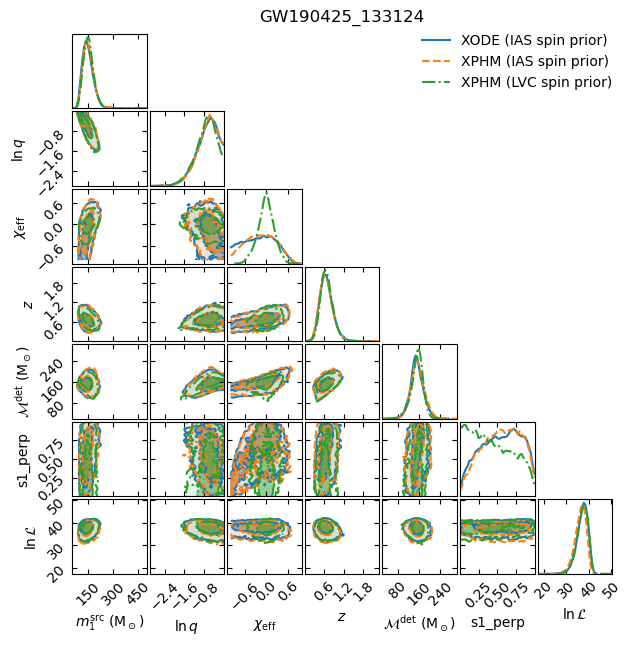

In [29]:
s0 = transform_samples(pd.read_feather(samples_dir/f'{eventname}/XODE_IAS_spin_prior/samples.feather'))
s1 = transform_samples(pd.read_feather(samples_dir/f'{eventname}/XPHM_IAS_spin_prior/samples.feather'))
s2 = transform_samples(pd.read_feather(samples_dir/f'{eventname}/XODE_LVK_spin_prior/samples.feather'))

# Note that the samples using NAUTILUS come with weights and these are implicitly being
# passed to the plotter
mcp = gw_plotting.MultiCornerPlot((s0, s1, s2),
                    bins=40, labels=['XODE (IAS spin prior)', 'XPHM (IAS spin prior)', 'XPHM (LVC spin prior)'],
                       params=['m1_source', 'lnq', 'chieff', 'z','mchirp','s1_perp', 'lnl'], density=True)

mcp.plot(max_figsize=7, title=eventname)
# Sometimes there are printed warnings. We however checked the PE is converged
# and the warnings are related to some spurious outlier samples in Nautilus
# and don't affect the evidence. We hope to fix this issue anyways in the next version.

In [30]:
# List of previously detected IAS events in Table 2

Prev_IAS_events = [(0, 'GW190711_030756'),
                 (1, 'GW190818_232544'),
                 (2, 'GW190707_083226'),
                 (3, 'GW200109_195634'),
                 (4, 'GW191117_023843')]

In [31]:
eventname = Prev_IAS_events[0][1]

In [32]:
s0 = transform_samples(pd.read_feather(samples_dir/f'{eventname}/XODE_IAS_spin_prior/samples.feather'))
max_lnl = dict(s0.iloc[np.argmax(s0['lnl'])])

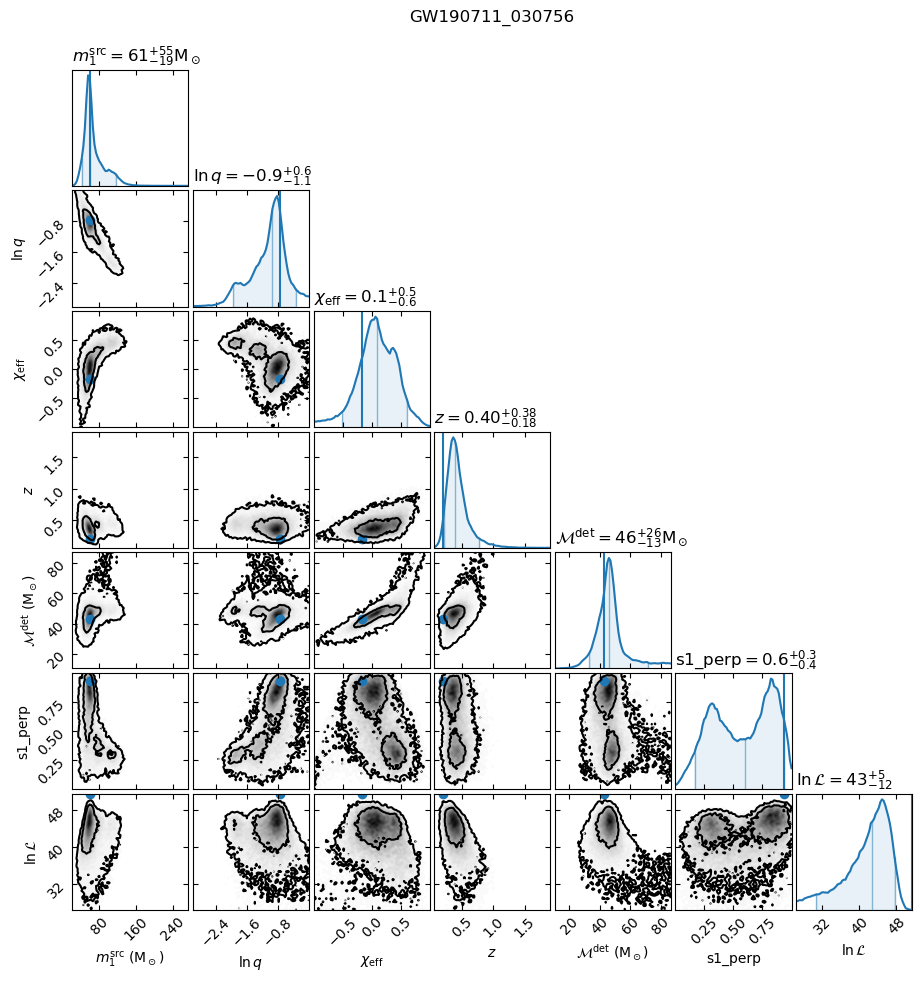

In [33]:
cp = gw_plotting.CornerPlot(s0[['m1_source', 'lnq', 'chieff', 'z','mchirp','s1_perp', 'lnl']])
cp.plot()
cp.scatter_points(max_lnl)
cp.fig.suptitle(eventname);

In [15]:
# We provide the .npz objects which can be used for running cogwheel PE for different priors
# at samples_dir/f'{eventname}/*.npz
# see https://github.com/jroulet/cogwheel/tree/main/tutorials for running cogwheel

# 3. PE samples of all events (including LVK, OGC and 22-only IAS events)

In [34]:
import pickle

In [39]:
# All_Event_samples_IAS_spin_prior.pkl and All_Event_samples_LVC_spin_prior.pkl contain the PE samples for all events
# Please download the them from https://drive.google.com/drive/folders/1YkuIo-yIJhIOSX3B0zRGlSJzwIT5D61U?usp=sharing
# and rename the path below
with open(samples_dir/'All_Event_samples_IAS_spin_prior.pkl', 'rb') as f:
    all_evn_samples = pickle.load(f)

In [41]:
lnl_diff_allow = 25
# This is the maximum allowed difference in log-likelihood between the maximum and the rest of the samples
# This is introduced to make the plot look cleaner, otherwise tails of the distributions can be very long

for evn_name in all_evn_samples:
    if evn_name not in ['GW200305_084739','GW200210_005122']:
        evn = all_evn_samples[evn_name]
        mask = evn['lnl'] > (evn['lnl'].max() - lnl_diff_allow)
        for key in evn:
            if evn[key] is not None:
                evn[key] = evn[key][mask]
        all_evn_samples[evn_name] = evn

In [42]:
import os, sys, scipy
import matplotlib as mpl

sys.path.insert(0, str(samples_dir))
import grid as gd
# grid.py is given in the github repo, add the path to it using sys.path.insert

tab20 = list(mpl.cm.get_cmap('tab20').colors)
tab20b = list(mpl.cm.get_cmap('tab20b').colors)
COLORS = tab20[ : : 2] + tab20[1 : : 2] + tab20b  # 40 colors

c = np.array(
    [[240,0,0],
     [239,133,0],
     [223,204,0],
     [153,194,0],
     [0,109,0]]) / 255

r, g, b = [scipy.interpolate.interp1d(np.linspace(0, 1, len(c)), y, kind='cubic')
           (np.linspace(0, 1, 255)) for y in c.T]

cm = mpl.colors.ListedColormap(np.vstack([r, g, b]).T)
cm.set_under(color=mpl.colors.to_hex(COLORS[7]), alpha=0.15)
cm.set_over(color=mpl.colors.to_hex(COLORS[0]), alpha=0.9)
new_evnames_HM = [ev[1] for ev in New_IAS_events]

# This function calculates an expanded range for a given list of values
# It a list of values 'x' and an expansion factor 'e' (default value is 1.05)
def expanded_range(x, e=1.05):
    a = min(x)
    b = max(x)
    c = (a + b) / 2
    d = b - a
    return c - d/2*e, c + d/2*e

/tmp/ipykernel_176204/3567377069.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab20 = list(mpl.cm.get_cmap('tab20').colors)
/tmp/ipykernel_176204/3567377069.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab20b = list(mpl.cm.get_cmap('tab20b').colors)


In [43]:
def make_multievent_plot(plot_2d_params=['mtot_source', 'chieff'], ranges_2d=None,
                         figsize=(8,4), evnames=None, xlim=None, ylim=None, fill=False, fractions=[1-np.exp(-.5)],
                         zoom=2, linewidths=1.6, sigma_gaussian_filter=0, pastro_colors=True,
                         set_legend=False, fig=None, ax=None,
                         colors=None, scatter_marker='o', scatter_marker_size=2, scatter_alpha=1):
    if evnames is None:
        evnames = list(all_evn_samples)
    if ranges_2d is None:
        ranges_2d = {ev: None for ev in evnames}
        
    grids = {ev: gd.Grid.from_samples(plot_2d_params, all_evn_samples[ev], pdf_key=ev, range=ranges_2d[ev],
                                      bins=80, weights=all_evn_samples[ev]['weights'])
             for ev in evnames}
    for g in grids.values():
        g.change_resolution(zoom)
        g.gaussian_filter(sigma_gaussian_filter)
    if pastro_colors:
        colors=[]
        for ev in evnames:
            if ev in new_evnames_HM:
                pastro = cands_dict[ev]['pastro']
                colors.append(cm(pastro*2-1,alpha=0.7))
            else:
                colors.append(cm(-2001))

    mg = gd.MultiGrid([g for g in grids.values()],
                      colors=colors, fill=fill,
                      fractions=fractions, linestyles='-')   

    for ps in mg.plotstyles:
        ps.style_2d.linewidths = linewidths

    mg.plot_2d(*plot_2d_params, figsize=figsize, xlim=xlim, ylim=ylim, set_legend=set_legend,
               fig=fig, ax=ax)
    plt.grid(linestyle=':')
    
    if scatter_marker is not None:
        for evclr, ev in zip(colors, evnames):
            plt.scatter(np.median(all_evn_samples[ev][plot_2d_params[0]]), np.median(all_evn_samples[ev][plot_2d_params[1]]),
                        marker=scatter_marker, s=scatter_marker_size,
                        color=evclr, cmap=cm)# alpha=scatter_alpha,

/tmp/ipykernel_176204/2048277093.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(np.median(all_evn_samples[ev][plot_2d_params[0]]), np.median(all_evn_samples[ev][plot_2d_params[1]]),


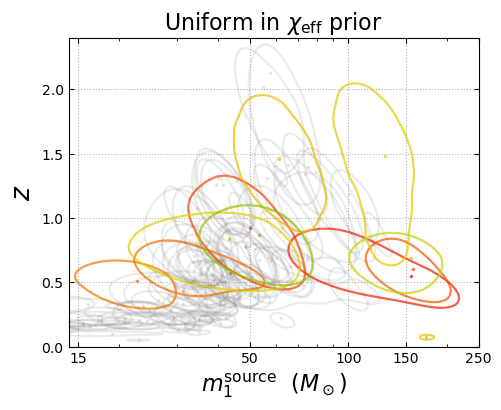

In [47]:
plot_2d_params = ['m1_source', 'z']
ranges_2d = {ev: [expanded_range(samples['m1_source']), None]
             for ev, samples in all_evn_samples.items()}

make_multievent_plot(plot_2d_params, ranges_2d, figsize=(5,3), xlim=(14, 350), ylim=(0,2.4), 
                     evnames=all_evn_samples.keys(),
                     sigma_gaussian_filter=4, fractions=[.5])

plt.tight_layout()
atest = plt.gca()
atest.set_xscale('log')
atest.set_xticks([15, 50, 100, 150, 250])
atest.set_xticklabels(['15', '50', '100', '150', '250'])
atest.set_xlim(right=250)
atest.figure.set_figheight(4)
atest.set_xlabel(r'$m^\mathrm{source}_1\ \ (M_\odot)$', fontsize=16)
atest.set_ylabel('$z$', fontsize=19);
atest.set_title('Uniform in $\chi_\mathrm{eff}$ prior', fontsize=16);

/tmp/ipykernel_176204/2048277093.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(np.median(all_evn_samples[ev][plot_2d_params[0]]), np.median(all_evn_samples[ev][plot_2d_params[1]]),


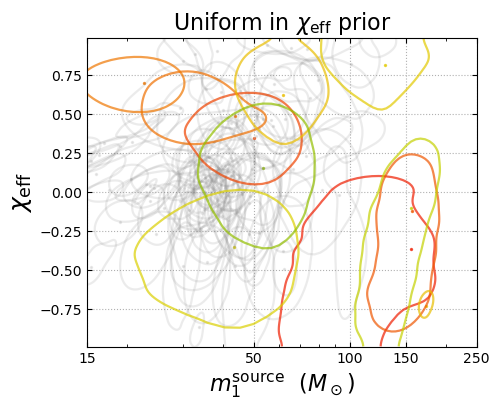

In [48]:
plot_2d_params = ['m1_source', 'chieff']
ranges_2d = {ev: [expanded_range(samples['m1_source']), None]
             for ev, samples in all_evn_samples.items()}

make_multievent_plot(plot_2d_params, ranges_2d, figsize=(5,3), xlim=(15, 350), ylim=(-0.99,0.99), 
                     evnames=all_evn_samples,
                     sigma_gaussian_filter=4, fractions=[.5])
plt.tight_layout()
atest = plt.gca()
atest.set_xscale('log')
atest.set_xticks([15, 50, 100, 150, 250])
atest.set_xticklabels(['15', '50', '100', '150', '250'])
atest.set_yticks([-0.75, -0.50, -0.25, 0.00, 0.25, 0.50, 0.75])
atest.set_xlabel(r'$m^\mathrm{source}_1\ \ (M_\odot)$', fontsize=16)
atest.set_ylabel('$\\chi_{{\\rm eff}}$', fontsize=18)
atest.figure.set_figheight(4)
atest.set_xlim(right=250); 
atest.set_title('Uniform in $\chi_\mathrm{eff}$ prior', fontsize=16);

In [52]:
with open(samples_dir/'All_Event_samples_LVC_spin_prior.pkl', 'rb') as f:
    all_evn_samples_LVK_prior = pickle.load(f)

/tmp/ipykernel_176204/2048277093.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(np.median(all_evn_samples[ev][plot_2d_params[0]]), np.median(all_evn_samples[ev][plot_2d_params[1]]),


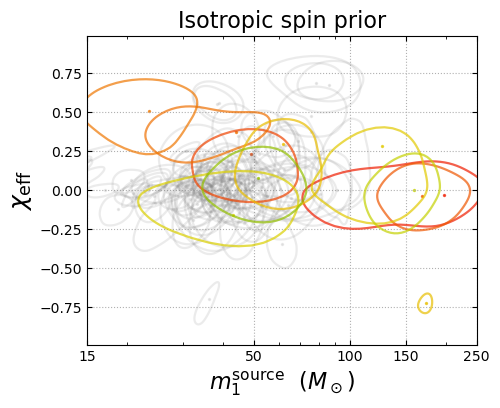

In [53]:
plot_2d_params = ['m1_source', 'chieff']
ranges_2d = {ev: [expanded_range(samples['m1_source']), None]
             for ev, samples in all_evn_samples_LVK_prior.items()}

make_multievent_plot(plot_2d_params, ranges_2d, figsize=(5,3), xlim=(15, 350), ylim=(-0.99,0.99), 
                     evnames=all_evn_samples_LVK_prior,
                     sigma_gaussian_filter=4, fractions=[.5])
plt.tight_layout()
atest = plt.gca()
atest.set_xscale('log')
atest.set_xticks([15, 50, 100, 150, 250])
atest.set_xticklabels(['15', '50', '100', '150', '250'])
atest.set_yticks([-0.75, -0.50, -0.25, 0.00, 0.25, 0.50, 0.75])
atest.set_xlabel(r'$m^\mathrm{source}_1\ \ (M_\odot)$', fontsize=16)
atest.set_ylabel('$\\chi_{{\\rm eff}}$', fontsize=18)
atest.figure.set_figheight(4)
atest.set_xlim(right=250); 
atest.set_title('Isotropic spin prior', fontsize=16);